# Pine Labs

Pine Labs is an Indian company that provides financing and last-mile retail transaction technology. It provides following services and products to its customers:
1. Payment solutions
2. POS systems for various businesses
3. Help businesses develop promotional infrastructure for rewards, loyalty points, pay later etc.
4. Platforms to build apps for various businesses

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/fintech/pine_labs/pine_labs.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(10483, 27)

## Preprocessing

In [4]:
processor = Processor('./../../data/config.json')

In [5]:
# Preprocess the data
pre_df, post_df = processor.preprocess(df)

In [6]:
# Create dictionaries
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [7]:
# Create corpus
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [8]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [9]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.016*"unicorn" + 0.015*"new" + 0.011*"chennai_mobiles" + 0.011*"funding" + '
  '0.009*"mastercards_swipe" + 0.009*"makes_st" + 0.009*"payment" + '
  '0.009*"know" + 0.009*"payment_fast" + 0.008*"join_guys"'),
 (1,
  '0.017*"payments" + 0.012*"india" + 0.010*"like_learn" + '
  '0.010*"situation_resolve" + 0.010*"issue_earliest" + 0.008*"share_concerns" '
  '+ 0.007*"upi" + 0.007*"developers" + 0.007*"machine" + 0.007*"cards"'),
 (2,
  '0.025*"plutus_smart" + 0.021*"machine_helps" + 0.014*"machine" + '
  '0.012*"join_friends" + 0.011*"payment" + 0.010*"secured" + 0.010*"payments" '
  '+ 0.010*"complain" + 0.009*"team" + 0.008*"card"'),
 (3,
  '0.061*"card_verification" + 0.034*"value_join" + 0.029*"value" + '
  '0.021*"answer" + 0.020*"ans" + 0.017*"team_touch" + 0.016*"tagging" + '
  '0.014*"customer_support" + 0.011*"shortly_thanks" + '
  '0.010*"forwarded_request"'),
 (4,
  '0.014*"bank" + 0.013*"machine" + 0.012*"customers" + 0.011*"emi" + '
  '0.010*"services" + 0.009*"issu

In [10]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [11]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.039*"join" + 0.037*"monthly_installment" + 0.037*"emi_equated" + '
  '0.026*"ans" + 0.024*"payment" + 0.012*"money" + 0.011*"days" + 0.008*"upi" '
  '+ 0.008*"safe" + 0.007*"tagging"'),
 (1,
  '0.020*"emi" + 0.014*"customers" + 0.010*"offer" + 0.009*"pos" + '
  '0.009*"bank_account" + 0.008*"option" + 0.007*"eyes_asia" + '
  '0.007*"operations_sinking" + 0.007*"win" + 0.007*"brands"'),
 (2,
  '0.140*"support_team" + 0.109*"soon_thanks" + 0.083*"forwarded_request" + '
  '0.056*"contact_details" + 0.048*"kindly_dm" + 0.026*"thanks" + '
  '0.023*"upi_bharat" + 0.021*"touch_shortly" + 0.011*"qr" + 0.011*"qr_apps"'),
 (3,
  '0.086*"join" + 0.021*"mobiles_laptops" + 0.019*"best" + 0.016*"pos" + '
  '0.014*"answer" + 0.012*"tagging" + 0.011*"mode" + 0.011*"join_friends" + '
  '0.009*"payment" + 0.009*"upi_preferred"'),
 (4,
  '0.033*"bank" + 0.031*"hdfc_bank" + 0.031*"state_bank" + 0.024*"join" + '
  '0.018*"india_icici" + 0.013*"transaction" + 0.011*"india" + '
  '0.008*"icici_bank

### Evaluation

In [12]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -14.919916552069836


In [13]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -13.89138377039454


## Hyper-parameter tuning

### Pre-COVID

In [14]:
pre_df_result = processor.perform_hyperparameter_tuning(pre_corpus, 
                                                        pre_id2word, 
                                                        pre_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/pine_labs/pre.csv")

100%|██████████| 780/780 [1:13:02<00:00,  5.62s/it]


In [15]:
# pre_df_result = pd.read_csv("./../../data/fintech/pine_labs/pre.csv")

In [16]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
26,75.0% Corpus,2,asymmetric,0.31,-11.165188
406,100% Corpus,2,0.9099999999999999,0.31,-11.699259
415,100% Corpus,2,asymmetric,0.01,-11.771352
528,100% Corpus,6,0.9099999999999999,0.9099999999999999,-12.079950
27,75.0% Corpus,2,asymmetric,0.61,-12.150760
388,75.0% Corpus,14,asymmetric,0.9099999999999999,-12.173118
558,100% Corpus,7,0.9099999999999999,0.9099999999999999,-12.201285
768,100% Corpus,14,0.9099999999999999,0.9099999999999999,-12.373467
588,100% Corpus,8,0.9099999999999999,0.9099999999999999,-12.396939
527,100% Corpus,6,0.9099999999999999,0.61,-12.567112


In [62]:
pre_ts_df = processor.create_topic_df(pre_df_result[pre_df_result['Validation_Set'] == '100% Corpus'], 
                                        '0.9099999999999999',
                                        '0.31')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

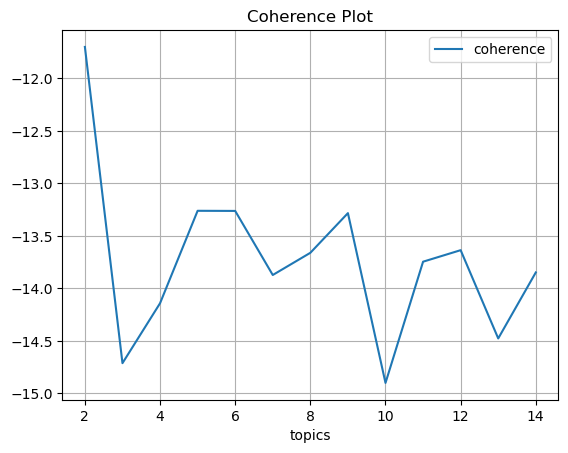

In [63]:
pre_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [64]:
fig = px.line(pre_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For pre-COVID period, there are two points 10 and 3 where are coherence score is close to 0. But for the initial analysis, 3 will be chosen.

In [65]:
pre_df_result[pre_df_result['Topics'] == 2].head(5)

,Validation_Set,Topics,Alpha,Beta,Coherence
26,75.0% Corpus,2,asymmetric,0.31,-11.165188
406,100% Corpus,2,0.9099999999999999,0.31,-11.699259
415,100% Corpus,2,asymmetric,0.01,-11.771352
27,75.0% Corpus,2,asymmetric,0.61,-12.150760
402,100% Corpus,2,0.61,0.61,-13.079818


### Post-COVID

In [21]:
post_df_result = processor.perform_hyperparameter_tuning(post_corpus, 
                                                        post_id2word, 
                                                        post_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/pine_labs/post.csv")

100%|██████████| 780/780 [1:52:16<00:00,  8.64s/it]


In [22]:
# post_df_result = pd.read_csv("./../../data/fintech/pine_labs/post.csv")

In [23]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
53,75.0% Corpus,3,symmetric,0.9099999999999999,-9.399011
78,75.0% Corpus,4,0.9099999999999999,0.9099999999999999,-9.461431
45,75.0% Corpus,3,0.9099999999999999,0.01,-9.576676
54,75.0% Corpus,3,symmetric,symmetric,-9.579636
443,100% Corpus,3,symmetric,0.9099999999999999,-9.600040
498,100% Corpus,5,0.9099999999999999,0.9099999999999999,-9.602470
50,75.0% Corpus,3,symmetric,0.01,-9.604303
111,75.0% Corpus,5,symmetric,0.31,-9.716062
31,75.0% Corpus,3,0.01,0.31,-9.741221
40,75.0% Corpus,3,0.61,0.01,-9.746915


In [48]:
post_ts_df = processor.create_topic_df(post_df_result[post_df_result['Validation_Set'] == '100% Corpus'], 
                                        'symmetric',
                                        '0.9099999999999999')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

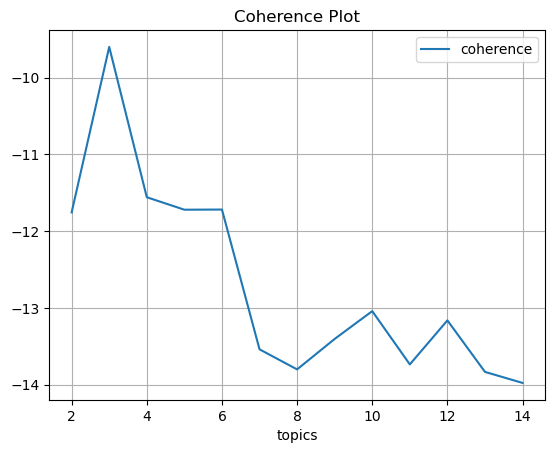

In [49]:
post_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [50]:
fig = px.line(post_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For the post-COVID period, the model with a number of topics equal to 2 gives the best coherence score.

In [51]:
post_df_result[(post_df_result['Topics'] == 3)].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
53,75.0% Corpus,3,symmetric,0.9099999999999999,-9.399011
45,75.0% Corpus,3,0.9099999999999999,0.01,-9.576676
54,75.0% Corpus,3,symmetric,symmetric,-9.579636
443,100% Corpus,3,symmetric,0.9099999999999999,-9.600040
50,75.0% Corpus,3,symmetric,0.01,-9.604303


## Final Models

### Pre-COVID

In [66]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.91,
                                        eta=0.31)

In [67]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -13.731349901693385


### Post-COVID

In [54]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=3,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='symmetric',
                                        eta=0.91)

In [55]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_final_coherence_lda)

Post-COVID Coherence Score:  -11.348477183910981


## Inferencing

### Pre-COVID

In [68]:
pre_df_topic_sents_keywords = processor.dominant_topics(ldamodel=pre_final_lda_model, 
                                                         corpus=pre_corpus, 
                                                         texts=pre_df['bigram'].values.tolist(),
                                                         tweets=pre_df['tweet'].values.tolist())

In [69]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.6599,"join, card_verification, payments, payment, he...",.@Mastercard has announced an investment in @P...
1,0,0.8804,"join, card_verification, payments, payment, he...","Pine Labs Launches One QR Code For UPI, Bharat..."
2,1,0.9091,"team, team_touch, service, business, new, than...",@abhayjani4 @srijancse @anmolm_ @MatrixPartner...
3,1,0.8339,"team, team_touch, service, business, new, than...","@jyotiarora89 @_vickybindra Hi Jyoti, Please D..."
4,1,0.7159,"team, team_touch, service, business, new, than...",@PineLabs Ready Team 🤩\n\n#GrowWithPineLabs @P...
...,...,...,...,...
3053,1,0.8847,"team, team_touch, service, business, new, than...",Other notable #tech companies that attracted r...
3054,0,0.5815,"join, card_verification, payments, payment, he...",Did you know that you can now offer easy EMIs ...
3055,1,0.6515,"team, team_touch, service, business, new, than...",@PineLabs Fraud company pine labs .....bad ne...
3056,1,0.8384,"team, team_touch, service, business, new, than...",Explore our newly designed website https://t.c...


In [70]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['join, card_verification, payments, payment, heres_perfect, solutions, thanks, screenshot, plutus_smart, value_join',
       'team, team_touch, service, business, new, thanks, card, company, machine, customer'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title:  Products and Services Annoucements
   - Key terms: 'join, card_verification, payments, payment, heres_perfect, solutions, thanks, screenshot, plutus_smart, value_join'
<br>
1. Topic Number: 1
   - Probable topic title: Customer Perception
   - Key terms: 'team, team_touch, service, business, new, thanks, card, company, machine, customer'

Topic 0 is a general discussion about the company but does not provide any specific relevant information. 

In [73]:
pre_dist, fig = processor.plot_topic_distribution(pre_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '1691'), Text(0, 0, '1367')]

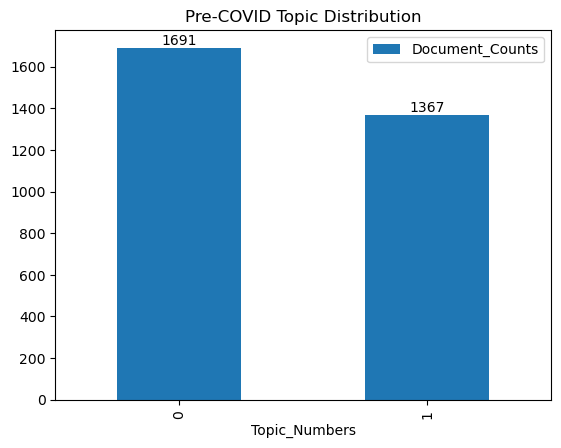

In [74]:
ax = pre_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Pre-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

People are using social media to raise their concerns.

### Post-COVID

In [75]:
post_df_topic_sents_keywords = processor.dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist(), tweets=pre_df['tweet'].values.tolist()
)

In [76]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,2,0.8168,"support_team, thanks, soon_thanks, forwarded_r...",.@Mastercard has announced an investment in @P...
1,2,0.8643,"support_team, thanks, soon_thanks, forwarded_r...","Pine Labs Launches One QR Code For UPI, Bharat..."
2,2,0.8642,"support_team, thanks, soon_thanks, forwarded_r...",@abhayjani4 @srijancse @anmolm_ @MatrixPartner...
3,2,0.8647,"support_team, thanks, soon_thanks, forwarded_r...","@jyotiarora89 @_vickybindra Hi Jyoti, Please D..."
4,1,0.9533,"service, payment, team, new, best, company, da...",@PineLabs Ready Team 🤩\n\n#GrowWithPineLabs @P...
...,...,...,...,...
5973,0,0.9370,"join, ans, participating_banks, biggest_networ...",NaN
5974,0,0.7073,"join, ans, participating_banks, biggest_networ...",NaN
5975,1,0.9225,"service, payment, team, new, best, company, da...",NaN
5976,1,0.8852,"service, payment, team, new, best, company, da...",NaN


In [77]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['support_team, thanks, soon_thanks, forwarded_request, dm_contact, contact_details, kindly_dm, touch_shortly, details_touch, team',
       'service, payment, team, new, best, company, days, customer, money, machine',
       'join, ans, participating_banks, biggest_networks, debit_cards, firstofitskind_emi, increase_sales, brand_emis, yes_bank, tagging'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Issue Resolutions by Company
   - Key terms: 'support_team, thanks, soon_thanks, forwarded_request, dm_contact, contact_details, kindly_dm, touch_shortly, details_touch, team'

<br>

2. Topic Number: 1
   - Probable topic title: Company Perception
   - Key terms: 'service, payment, team, new, best, company, days, customer, money, machine'

<br>

3. Topic Number: 2
   - Probable topic title: *Not a good topic*
   - Key terms: 'join, biggest_networks, participating_banks, debit_cards, firstofitskind_emi, increase_sales, thanks, monthly_installment, emi_equated, ans'

The third topic has mostly funding related tweets which has increased the valuation of company.

In [81]:
post_dist, fig = processor.plot_topic_distribution(post_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '2271'), Text(0, 0, '2200'), Text(0, 0, '1507')]

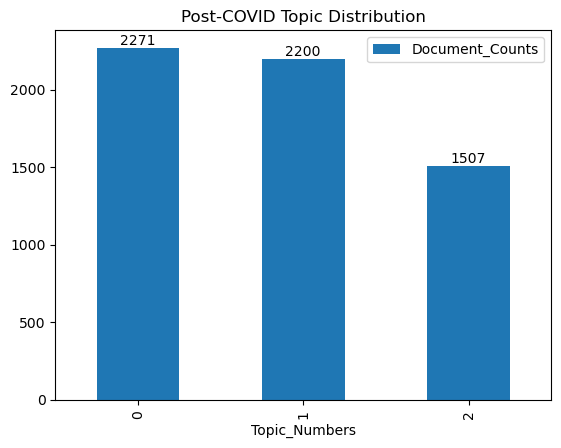

In [82]:
ax = post_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Post-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

The distribution of first 2 topics is nearly equal. Company started using social media to address people concerns. Company's interaction with users saw an increase.

In [83]:
# Save outputs
pre_df_topic_sents_keywords.to_csv('./../../data/fintech/pine_labs/pine_labs_pre_output.csv', index=True)
post_df_topic_sents_keywords.to_csv('./../../data/fintech/pine_labs/pine_labs_post_output.csv', index=True)